In [1]:
#Trang's analysis and code <3
import numpy as np
import pandas as pd
import matplotlib as plt

# Load Dataset

In [3]:
df = pd.read_excel (r'/Users/judywang/fall-fellowship-2022/basketball/NBA_2008_2016.xlsx')
df.head()

,Year,Team,Wins,Losses,Points,Opp Points,Act W-L%
0,2015-16,Atlanta Hawks,48,34,8433,8137,0.585
1,2015-16,Boston Celtics,48,34,8669,8406,0.585
2,2015-16,Brooklyn Nets,21,61,8089,8692,0.256
3,2015-16,Charlotte Hornets,48,34,8479,8256,0.585
4,2015-16,Chicago Bulls,42,40,8335,8456,0.512


# Explore the dataset

array([[<AxesSubplot: title={'center': 'Wins'}>,
        <AxesSubplot: title={'center': 'Losses'}>,
        <AxesSubplot: title={'center': 'Points'}>],
       [<AxesSubplot: title={'center': 'Opp Points'}>,
        <AxesSubplot: title={'center': 'Act W-L%'}>,
        <AxesSubplot: title={'center': 'Ratio'}>],
       [<AxesSubplot: title={'center': 'Pred W-L%'}>,
        <AxesSubplot: title={'center': 'Error'}>, <AxesSubplot: >]],
      dtype=object)

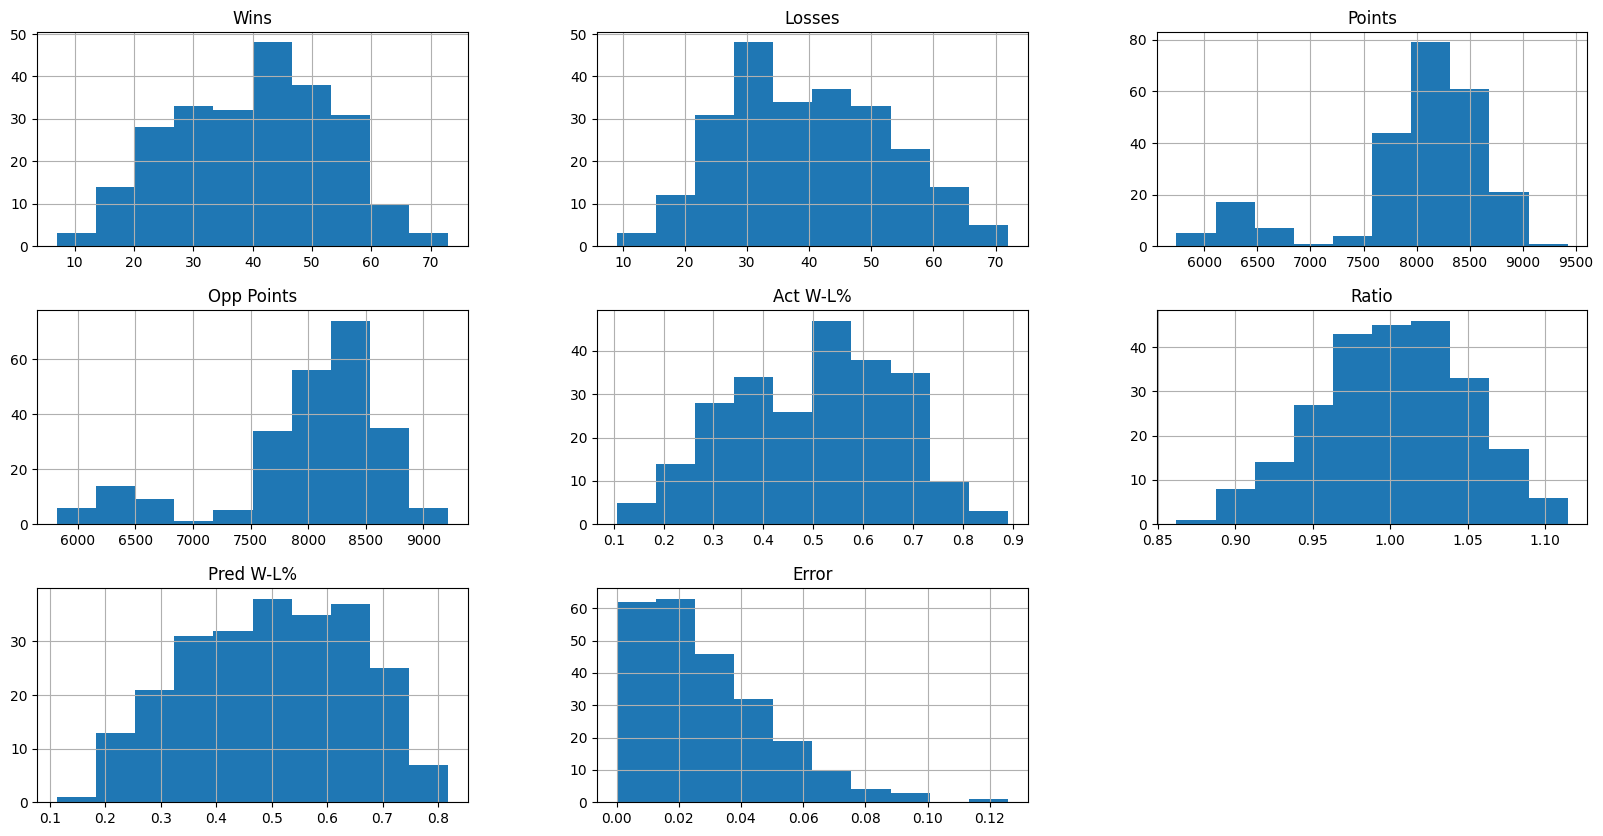

In [4]:
# Exponent is 13.91
exp =13.91
# get the ratio of points by the opp points
df['Ratio'] = df['Points'] / df['Opp Points']
# get the predicion of win 
df['Pred W-L%'] = df['Ratio']**exp / (df['Ratio']**exp + 1)
# get error
df['Error'] = abs(df['Pred W-L%'] - df['Act W-L%'])
# plot the histogram of the data 
plt.rcParams['figure.figsize'] = (20.0, 10.0)
df.hist()


The features follow a normal distribution.

# Analyze the error


Mean of error is  0.028652797163369218
SD of error is  0.02154148827317081


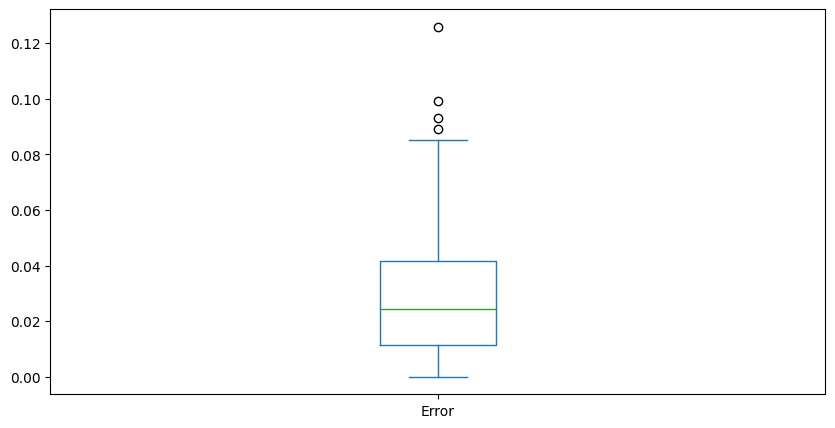

In [8]:
# plot the error by boxplot
plt.rcParams['figure.figsize'] = (10.0, 5.0)
df['Error'].plot.box()
# get the mean and standard deviation of error
print("Mean of error is ", df['Error'].mean())
print("SD of error is ", df['Error'].std())

We notice there are some outliers - let's find out where they are

In [9]:
# get the error outliars
df[df['Error'] > 0.086]


,Year,Team,Wins,Losses,Points,Opp Points,Act W-L%,Ratio,Pred W-L%,Error
9,2015-16,Golden State Warriors,73,9,9421,8539,0.890,1.103291,0.796946,0.093054
14,2015-16,Memphis Grizzlies,42,40,8126,8310,0.512,0.977858,0.422759,0.089241
77,2013-14,Minnesota Timberwolves,40,42,8768,8549,0.488,1.025617,0.587065,0.099065
142,2011-12,Philadelphia 76ers,35,31,6180,5900,0.530,1.047458,0.655872,0.125872


# Mean Error for each year

Mean error for exp = 13.91 for all NBA games between 2008 and 2015 is  0.028652797163369218
Mean error for exp = 13.91 for each year is 
      Year  Mean Error for exp = 13.91
0  2008-09                    0.020999
1  2009-10                    0.030874
2  2010-11                    0.031301
3  2011-12                    0.032002
4  2012-13                    0.029557
5  2013-14                    0.029291
6  2014-15                    0.027552
7  2015-16                    0.027647


<AxesSubplot: xlabel='Year'>

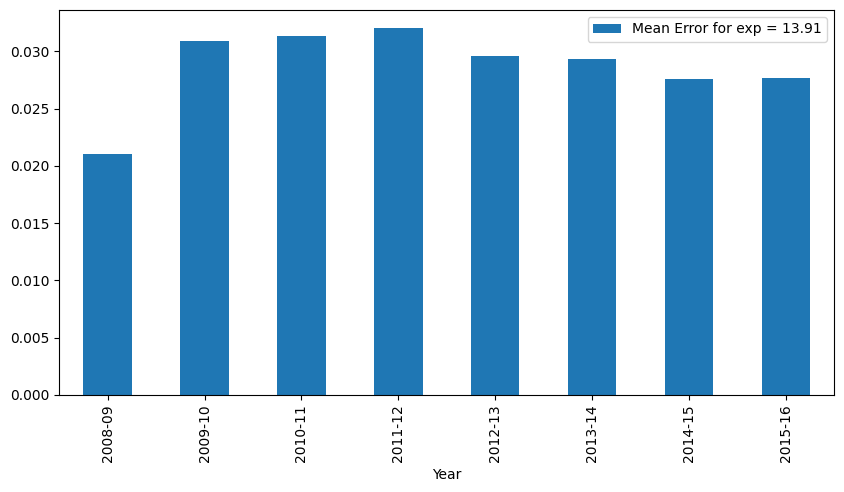

In [10]:
# get the average error for all years
print("Mean error for exp = 13.91 for all NBA games between 2008 and 2015 is ", df['Error'].mean())
# get the average error for each year
print("Mean error for exp = 13.91 for each year is ")
df_mean_error_exp_13_91 = df.groupby('Year')['Error'].mean().to_frame().reset_index()
df_mean_error_exp_13_91.columns = ['Year', 'Mean Error for exp = 13.91']
df_mean_error_exp_13_91['Year'] = df_mean_error_exp_13_91['Year'].astype(str)
print(df_mean_error_exp_13_91)

# plot the mean error for each year
df_mean_error_exp_13_91.plot(x='Year', y='Mean Error for exp = 13.91', kind='bar', figsize=(10, 5))

Pythagorean Hypothesis predicts the performance of each year pretty well.

# Explore the exponenet that would yield the smallest mean error in each year

In [11]:
# get an array of exponent
arr_exp = np.arange(10, 20, 0.1)
# make a dataframe to store the mean error for each exponent
df_mean_error = pd.DataFrame(df['Year'].unique().tolist(), columns= ['Year'])
df_mean_error['Year'] = df_mean_error['Year'].astype(str)
# get the average for each exponent in each year
for exp in arr_exp:
    df['Pred W-L%'] = df['Ratio']**exp / (df['Ratio']**exp + 1)
    df['Error'] = abs(df['Pred W-L%'] - df['Act W-L%'])
    temp_df = df.groupby('Year')['Error'].mean().to_frame().reset_index()
    temp_df.columns = ['Year', str(round(exp,2))]
    temp_df['Year'] = temp_df['Year'].astype(str)
    df_mean_error = pd.merge(df_mean_error, temp_df, on='Year', how='left')

df_mean_error = pd.melt(df_mean_error, id_vars=['Year'], var_name='Exponent', value_name='Mean Error').sort_values(by=['Year', 'Exponent'])
df_mean_error

,Year,Exponent,Mean Error
7,2008-09,10.0,0.051025
15,2008-09,10.1,0.050163
23,2008-09,10.2,0.049303
31,2008-09,10.3,0.048444
39,2008-09,10.4,0.047587
...,...,...,...
760,2015-16,19.5,0.045043
768,2015-16,19.6,0.045532
776,2015-16,19.7,0.046021
784,2015-16,19.8,0.046537


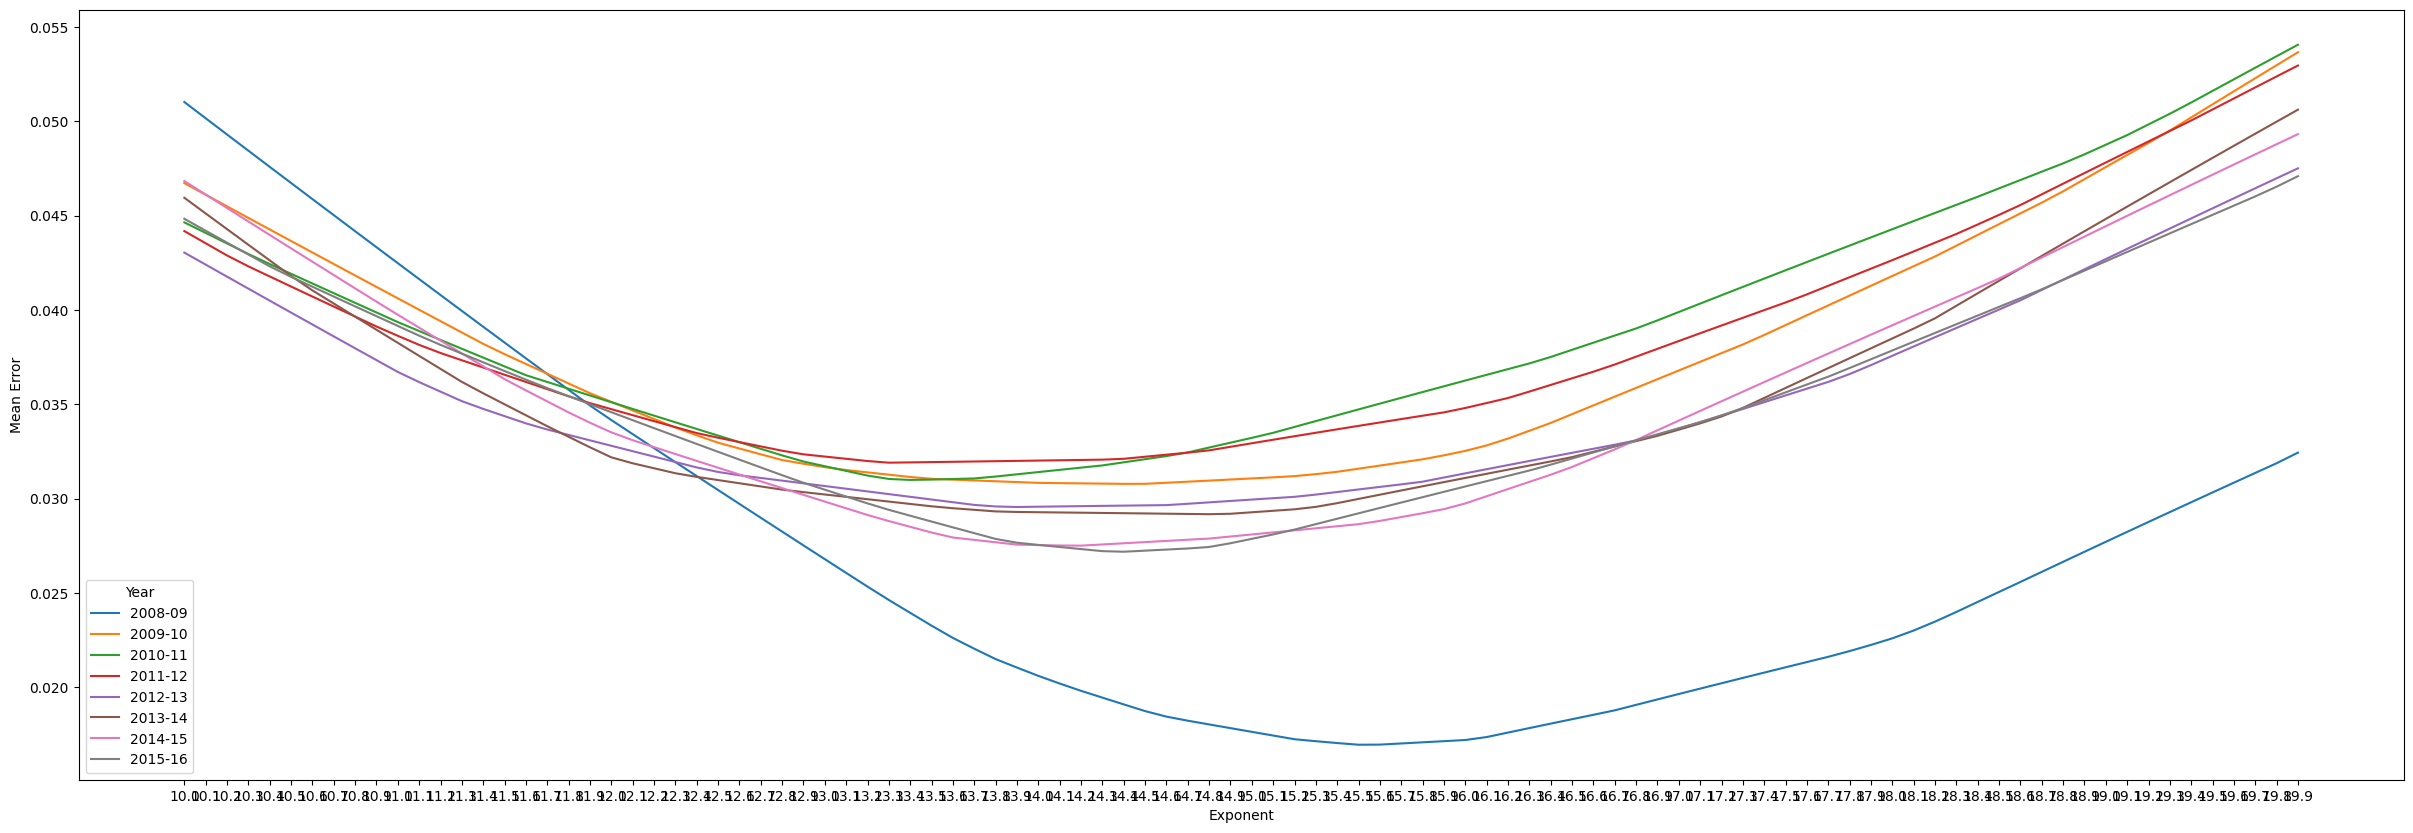

In [12]:
# plot the mean error for each exponent
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.lineplot(data=df_mean_error, x='Exponent', y='Mean Error', hue='Year')
plt.show()


In [13]:
# get the minimum mean error and the exponent for each year
df_min_error = df_mean_error.groupby('Year')['Mean Error'].min().to_frame().reset_index()
df_min_error.columns = ['Year', 'Mean Error']
df_min_error['Year'] = df_min_error['Year'].astype(str)
df_min_error = pd.merge(df_min_error, df_mean_error, on=['Year', 'Mean Error'], how='left')
df_min_error
pd.merge(df_min_error, df_mean_error_exp_13_91, on='Year', how='left')

,Year,Mean Error,Exponent,Mean Error for exp = 13.91
0,2008-09,0.016954,15.5,0.020999
1,2009-10,0.030784,14.4,0.030874
2,2010-11,0.030991,13.4,0.031301
3,2011-12,0.031905,13.3,0.032002
4,2012-13,0.029555,13.9,0.029557
5,2013-14,0.029174,14.8,0.029291
6,2014-15,0.027507,14.2,0.027552
7,2015-16,0.027185,14.4,0.027647


Going forward, we should look for indicators for W-L%. One idea is looking at the history of wins of the players each year to see if there is a correlation.
